<a href="https://colab.research.google.com/github/Gayatri2912/22BDS0126/blob/main/22bds0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1 – Dataset Load & Basic Info
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
# quick peek
df.head()


,rownames,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


In [2]:
#Step 2 – Dimensions
print("Shape of dataset:", df.shape)


Shape of dataset: (765, 13)


In [3]:
#Step 3 – Summary Statistics
# Info about columns
df.info()

# Summary for numeric columns
df.describe()

# Summary for categorical columns
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    765 non-null    int64  
 1   state       765 non-null    object 
 2   year        765 non-null    int64  
 3   miles       765 non-null    int64  
 4   fatalities  765 non-null    float64
 5   seatbelt    556 non-null    float64
 6   speed65     765 non-null    object 
 7   speed70     765 non-null    object 
 8   drinkage    765 non-null    object 
 9   alcohol     765 non-null    object 
 10  income      765 non-null    int64  
 11  age         765 non-null    float64
 12  enforce     765 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 77.8+ KB


,state,speed65,speed70,drinkage,alcohol,enforce
count,765,765,765,765,765,765
unique,51,2,2,2,2,3
top,AK,yes,no,yes,no,secondary
freq,15,494,711,677,676,379


In [4]:
#Step 4 – Data Handling (Missing Values)
# Count missing values in each column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100


,0
rownames,0.000000
state,0.000000
year,0.000000
miles,0.000000
fatalities,0.000000
seatbelt,27.320261
speed65,0.000000
speed70,0.000000
drinkage,0.000000
alcohol,0.000000


In [5]:
#Step 5 - Drop missing rows if any
df = df.dropna(subset=['seatbelt'])


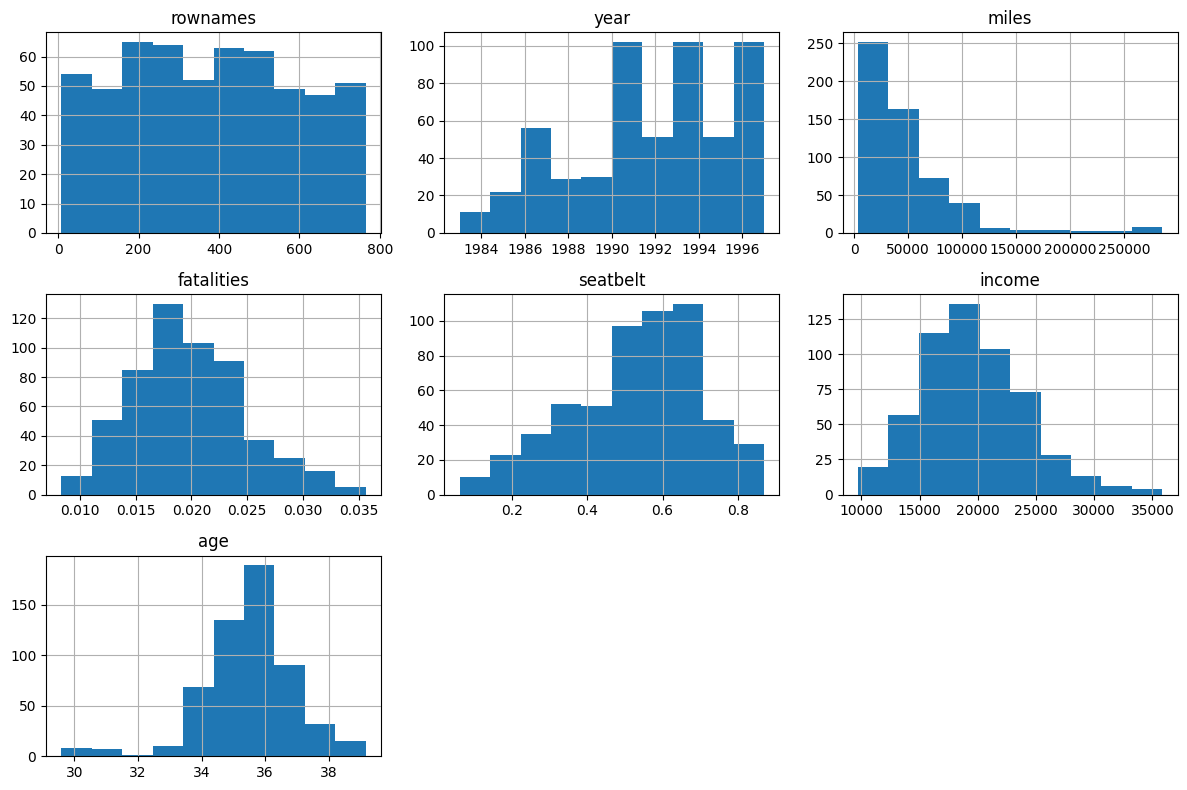

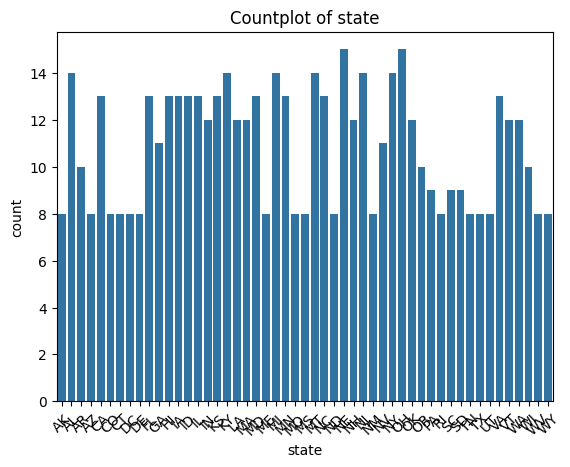

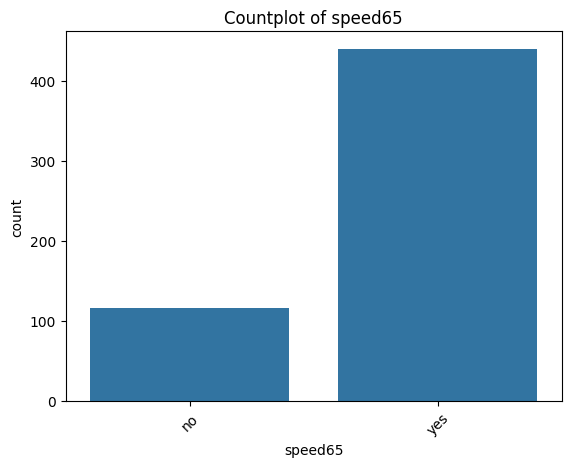

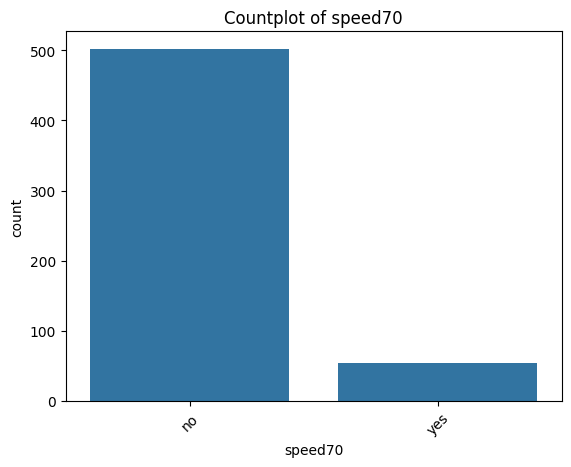

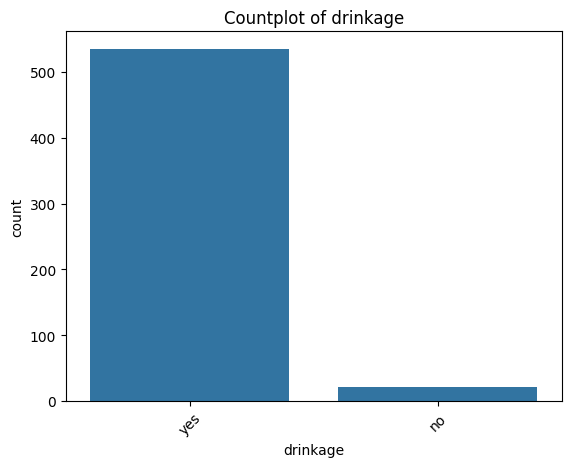

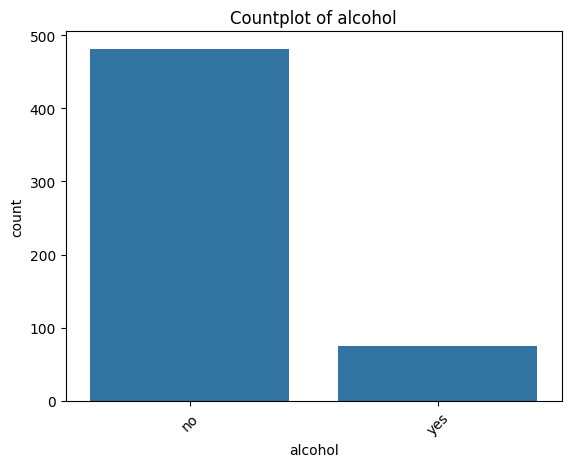

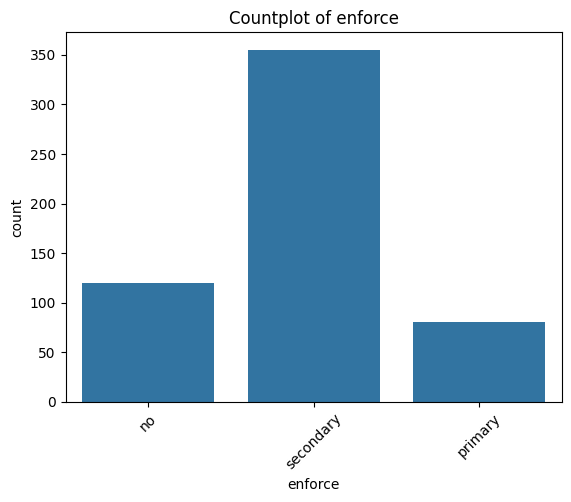

In [6]:
#Step 6 – Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Countplot for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


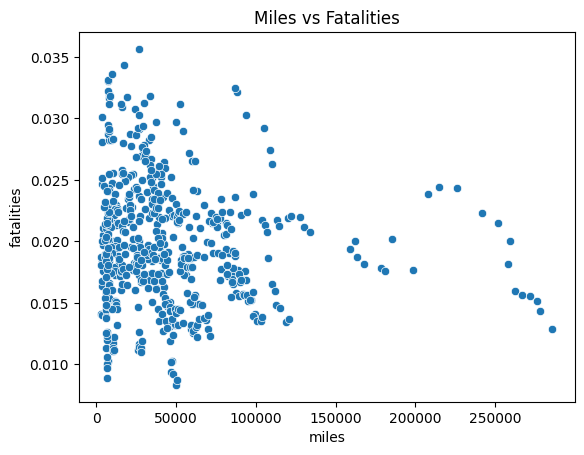

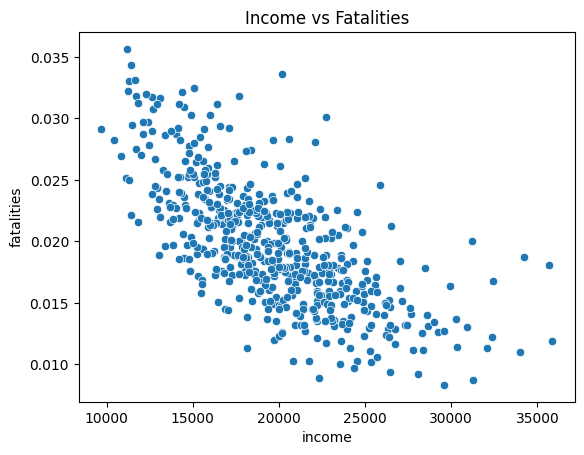

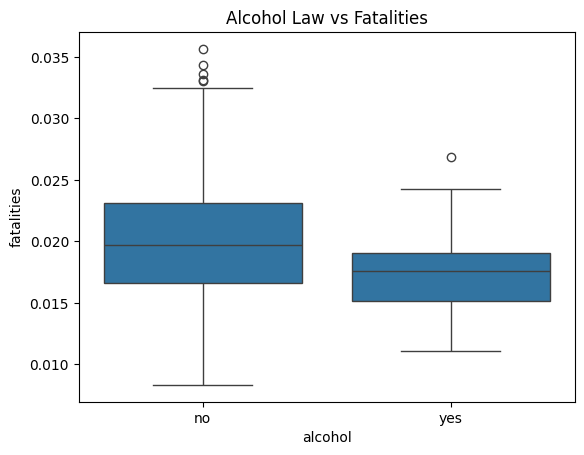

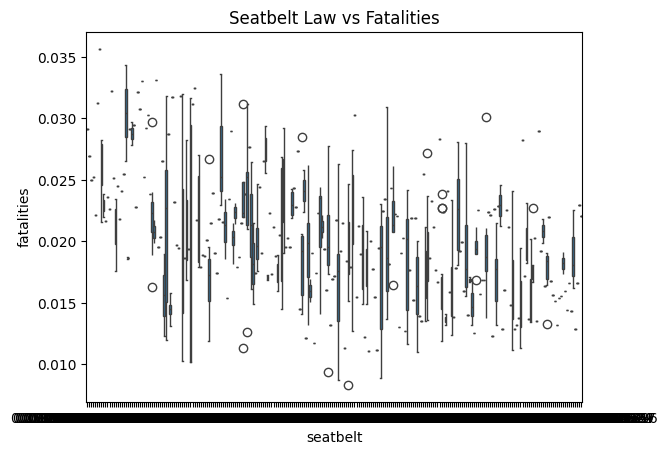

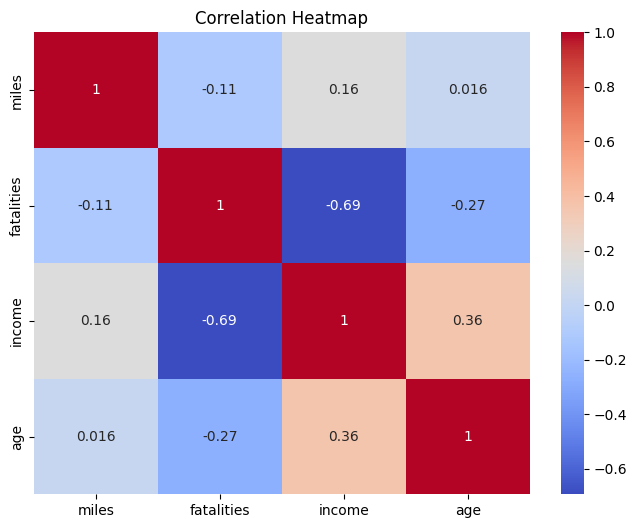

enforce   no  primary  secondary
alcohol                         
no       104       63        314
yes       16       18         41
alcohol   no  yes
seatbelt         
0.060      1    0
0.070      1    0
0.090      1    0
0.099      1    0
0.110      1    0
...       ..  ...
0.850      0    3
0.852      0    1
0.853      1    0
0.860      0    1
0.870      0    1

[245 rows x 2 columns]


In [7]:
#Step 7 – Bivariate Analysis
# Scatterplots
sns.scatterplot(x='miles', y='fatalities', data=df)
plt.title("Miles vs Fatalities")
plt.show()

sns.scatterplot(x='income', y='fatalities', data=df)
plt.title("Income vs Fatalities")
plt.show()

# Boxplots (Categorical vs Numeric)
sns.boxplot(x='alcohol', y='fatalities', data=df)
plt.title("Alcohol Law vs Fatalities")
plt.show()

sns.boxplot(x='seatbelt', y='fatalities', data=df)
plt.title("Seatbelt Law vs Fatalities")
plt.show()

# Correlation Heatmap
numeric_cols = ['miles', 'fatalities', 'income', 'age']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Crosstab Examples
print(pd.crosstab(df['alcohol'], df['enforce']))
print(pd.crosstab(df['seatbelt'], df['alcohol']))


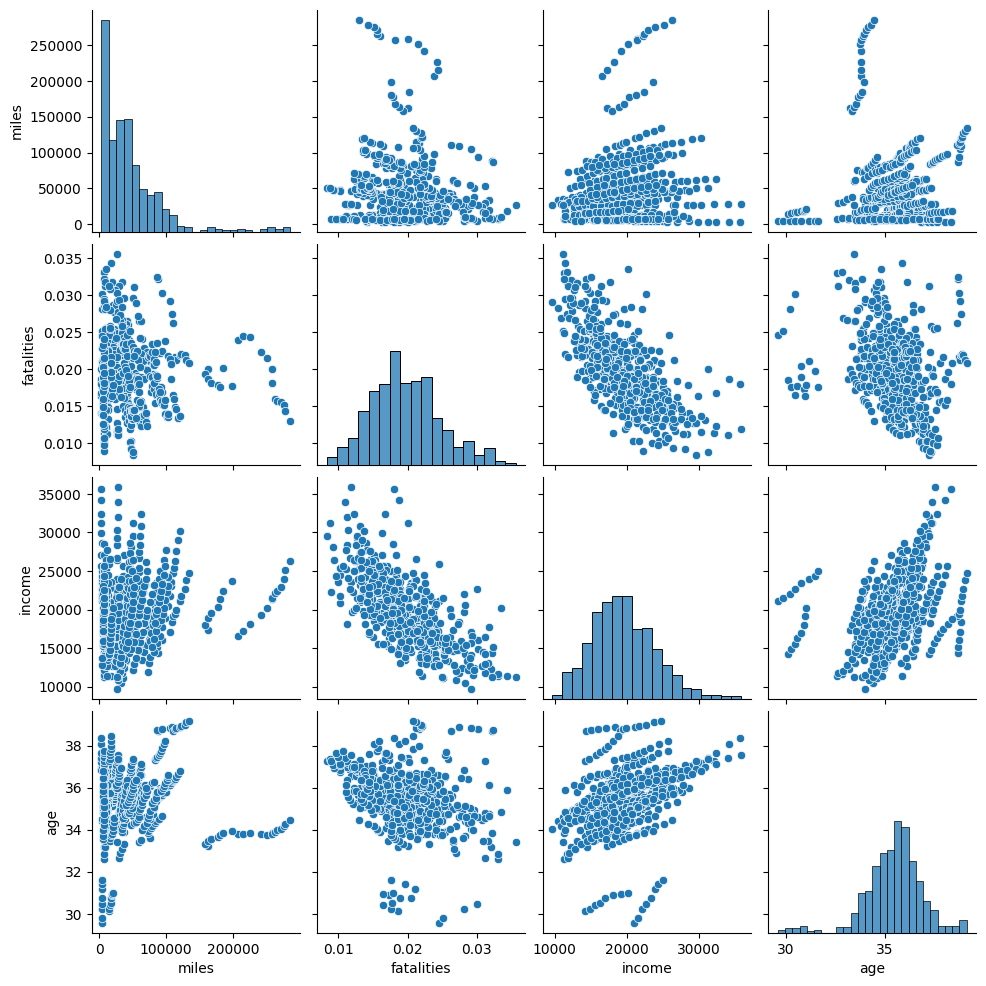

alcohol  enforce  
no       no           0.022431
         primary      0.019148
         secondary    0.019555
yes      no           0.016135
         primary      0.019565
         secondary    0.017112
Name: fatalities, dtype: float64
seatbelt     0.060     0.070     0.090     0.099     0.110     0.120  \
alcohol                                                                
no        0.029118  0.026976  0.024965  0.025214  0.022109  0.031211   
yes            NaN       NaN       NaN       NaN       NaN       NaN   

seatbelt     0.128     0.130     0.150     0.159  ...    0.830     0.831  \
alcohol                                           ...                      
no        0.035649  0.025801  0.022895  0.021653  ...      NaN  0.015993   
yes            NaN       NaN       NaN       NaN  ...  0.01823       NaN   

seatbelt     0.840     0.842     0.845     0.850     0.852     0.853  \
alcohol                                                                
no        0.014411  0.01

In [8]:
#Step 8 – Multivariate Analysis
# Pairplot for numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Groupby example
print(df.groupby(['alcohol', 'enforce'])['fatalities'].mean())

# Pivot table
print(pd.pivot_table(df, values='fatalities', index='alcohol', columns='seatbelt', aggfunc='mean'))


Dataset loaded and cleaned. Starting 1D Analysis...

--- 1D Analysis: Skewness and Kurtosis ---
            Skewness  Kurtosis
miles       2.519186  8.367602
fatalities  0.416344  0.017556
seatbelt   -0.469884 -0.339125
income      0.569836  0.537237
age        -0.777747  2.595411

--- 1D Analysis: Quantiles (Distribution Summary) ---
         miles  fatalities  seatbelt    income        age
0.25   13004.5    0.016217     0.420  16475.75  34.726885
0.50   35143.0    0.019215     0.550  19202.00  35.594189
0.75   59968.0    0.022647     0.650  22320.75  36.274090
0.90   93568.0    0.026496     0.719  25274.00  37.059473
0.95  115978.5    0.029180     0.790  27168.25  37.605438

--- 1D Analysis: Categorical Variable Frequency Distributions ---

Frequency Distribution for 'speed65':
speed65
yes    79.14%
no     20.86%
Name: proportion, dtype: object

Frequency Distribution for 'speed70':
speed70
no     90.29%
yes     9.71%
Name: proportion, dtype: object

Frequency Distribution for 'drink

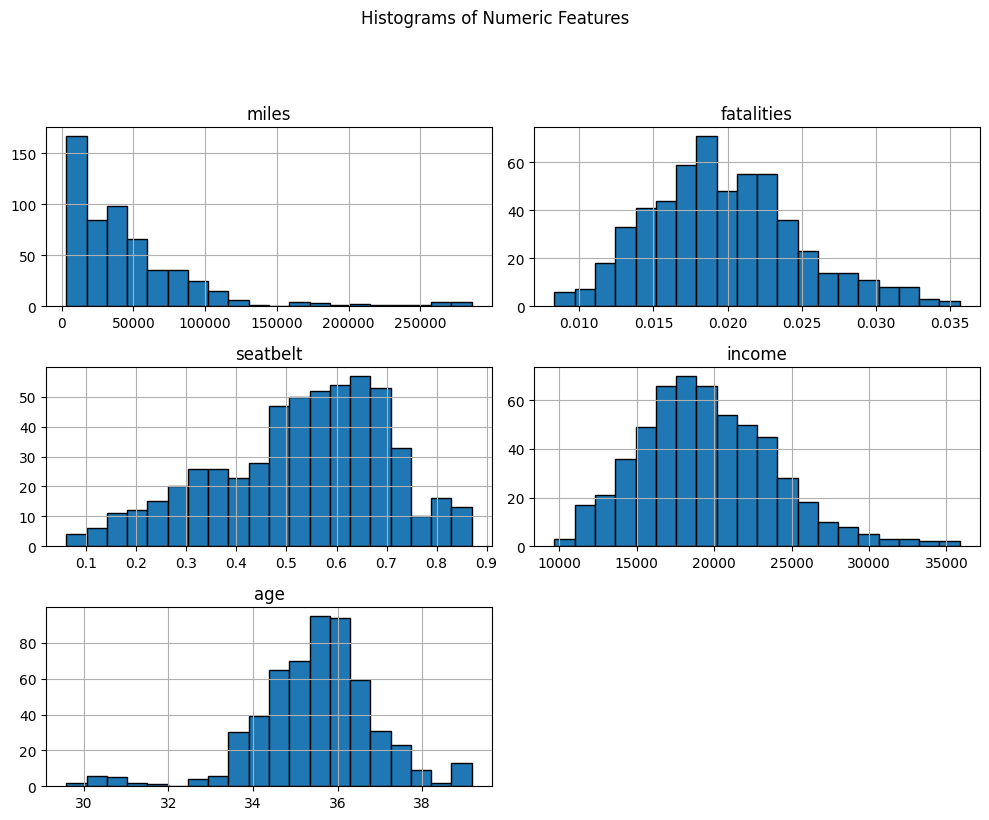

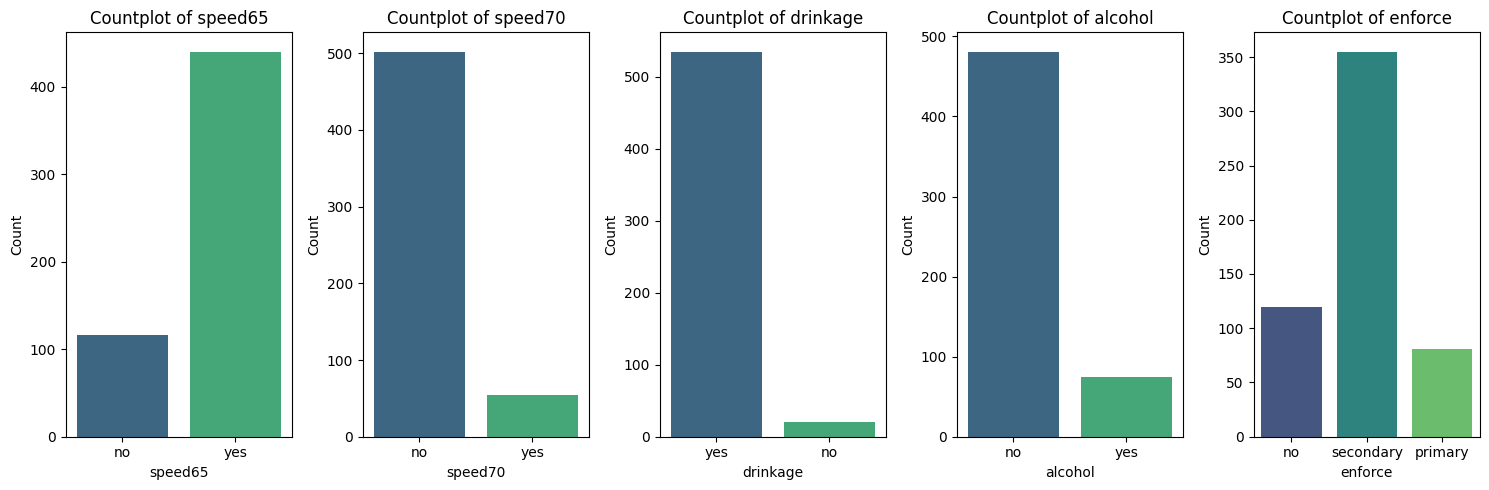

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PROJECT START: SETUP AND CLEANING ---

# Load dataset
# Ensure this URL is correct and accessible in your environment
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading data: {e}. Please check the file path or network connection.")
    # Exit or handle error gracefully if loading fails
    # return

# Drop missing rows in 'seatbelt' (as per your previous cleaning)
df = df.dropna(subset=['seatbelt'])

# Define column groups
numeric_cols = ['miles', 'fatalities', 'seatbelt', 'income', 'age']
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']

print("Dataset loaded and cleaned. Starting 1D Analysis...\n")


# --- 1D ANALYSIS: SKEWNESS, KURTOSIS, AND QUANTILES ---


print("--- 1D Analysis: Skewness and Kurtosis ---")
# Skewness measures the asymmetry of the distribution (long tails).
# Kurtosis measures the 'tailedness' or presence of outliers.
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})
print(skew_kurt)

print("\n--- 1D Analysis: Quantiles (Distribution Summary) ---")
# Quantiles provide a precise summary of data spread, crucial for assessing non-normal data.
quantiles = df[numeric_cols].quantile([0.25, 0.5, 0.75, 0.90, 0.95])
print(quantiles)


# --- 1D ANALYSIS: FREQUENCY DISTRIBUTIONS ---


print("\n--- 1D Analysis: Categorical Variable Frequency Distributions ---")
for col in categorical_cols:
    print(f"\nFrequency Distribution for '{col}':")
    # Displays the percentage distribution of each category
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


# --- 1D PLOTTING: HISTOGRAMS AND COUNTPLOTS ---


# 1. Histograms for Numeric Columns (Frequency Distribution Visualization)
# Visualize the shape of the distributions, confirming skewness/kurtosis visually.
df[numeric_cols].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

# 2. Countplots for Categorical Columns
# Visualize the frequency of each category.
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 5, i + 1)
    # Corrected code to suppress the FutureWarning: assign 'x' to 'hue' and set legend=False
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Dataset ready for 2D Analysis...

--- 2D Analysis: Numerical vs. Numerical (Correlation Heatmap) ---


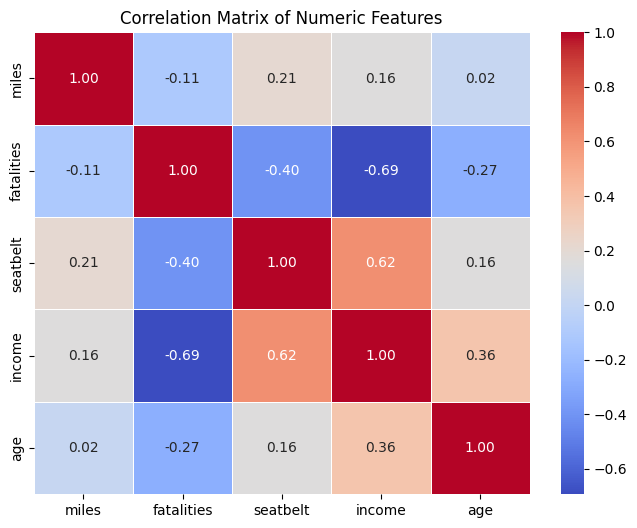


Correlation with Fatalities (Target Variable):
fatalities    1.000000
miles        -0.111337
age          -0.273024
seatbelt     -0.402714
income       -0.692862
Name: fatalities, dtype: float64

--- 2D Analysis: Numerical vs. Categorical (Box Plots) ---


/tmp/ipython-input-1020299317.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='enforce', y='fatalities', data=df, palette='Set1')


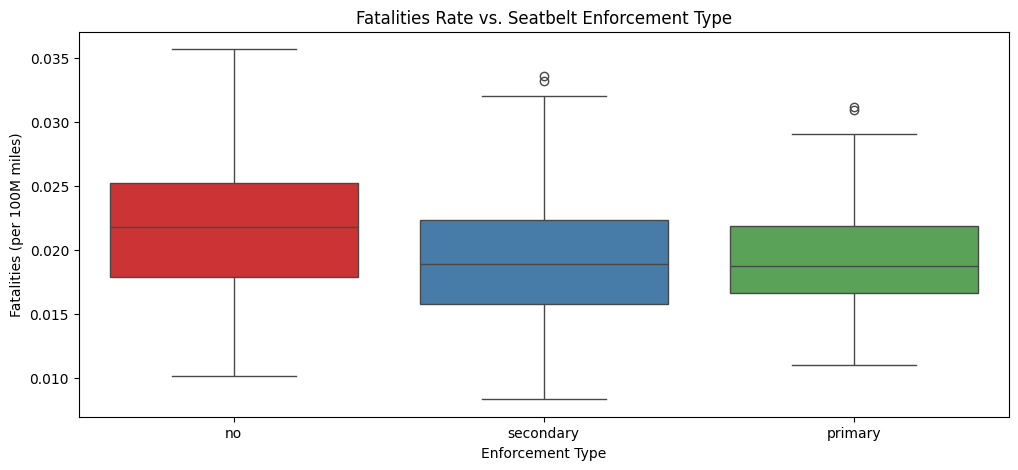

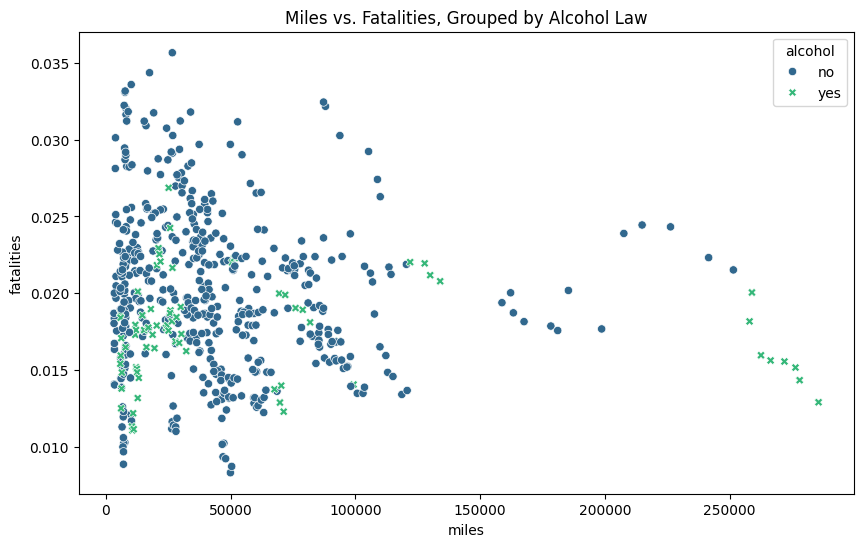


--- 2D Analysis: Categorical vs. Categorical (Contingency Table/Crosstab) ---
Contingency Table (Enforce vs. Alcohol):
alcohol     no  yes  All
enforce                 
no         104   16  120
primary     63   18   81
secondary  314   41  355
All        481   75  556

--- 2D Analysis: Categorical vs. Categorical (Stacked Bar Plot) ---


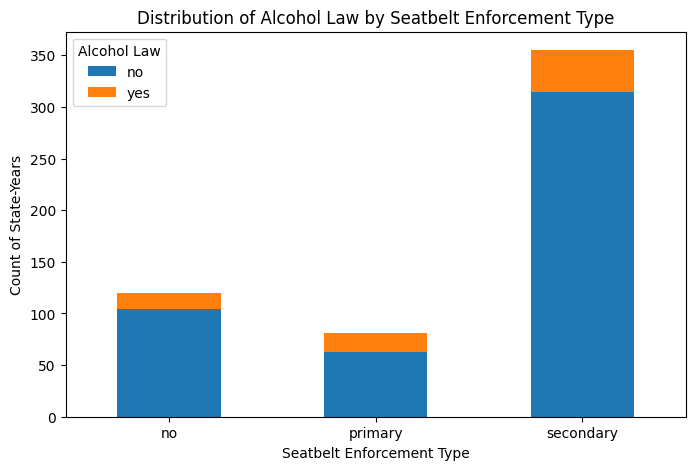

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PROJECT START: SETUP AND CLEANING ---

# Load dataset (Replace with your actual path/method if needed)
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
df = df.dropna(subset=['seatbelt'])

# Define column groups
numeric_cols = ['miles', 'fatalities', 'seatbelt', 'income', 'age']
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']

print("Dataset ready for 2D Analysis...\n")


# --- 2D ANALYSIS: NUMERICAL vs NUMERICAL ---


print("--- 2D Analysis: Numerical vs. Numerical (Correlation Heatmap) ---")
plt.figure(figsize=(8, 6))
# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Focus on correlation with the target variable 'fatalities'
print("\nCorrelation with Fatalities (Target Variable):")
print(corr_matrix['fatalities'].sort_values(ascending=False))



# --- 2D ANALYSIS: NUMERICAL vs CATEGORICAL ---


print("\n--- 2D Analysis: Numerical vs. Categorical (Box Plots) ---")
# Box plot is ideal to compare the distribution of a numerical feature across categories.
# We'll examine the relationship between 'fatalities' and 'enforce' (seatbelt law type).

plt.figure(figsize=(12, 5))
sns.boxplot(x='enforce', y='fatalities', data=df, palette='Set1')
plt.title('Fatalities Rate vs. Seatbelt Enforcement Type')
plt.xlabel('Enforcement Type')
plt.ylabel('Fatalities (per 100M miles)')
plt.show()

# Example: Scatter plot of 'miles' vs 'fatalities', colored by 'alcohol' law
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miles', y='fatalities', hue='alcohol', data=df, style='alcohol', palette='viridis')
plt.title('Miles vs. Fatalities, Grouped by Alcohol Law')
plt.show()


# --- 2D ANALYSIS: CATEGORICAL vs CATEGORICAL ---


print("\n--- 2D Analysis: Categorical vs. Categorical (Contingency Table/Crosstab) ---")
# Crosstab shows the joint frequency of two categorical variables.
# Example: Relationship between 'alcohol' law status and 'enforce' law status.

crosstab_enforce_alcohol = pd.crosstab(df['enforce'], df['alcohol'], margins=True)
print("Contingency Table (Enforce vs. Alcohol):")
print(crosstab_enforce_alcohol)

print("\n--- 2D Analysis: Categorical vs. Categorical (Stacked Bar Plot) ---")
# Visualize the distribution from the crosstab using a stacked bar plot.
crosstab_enforce_alcohol.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Alcohol Law by Seatbelt Enforcement Type')
plt.xlabel('Seatbelt Enforcement Type')
plt.ylabel('Count of State-Years')
plt.xticks(rotation=0)
plt.legend(title='Alcohol Law')
plt.show()

Dataset ready for 3D Analysis...



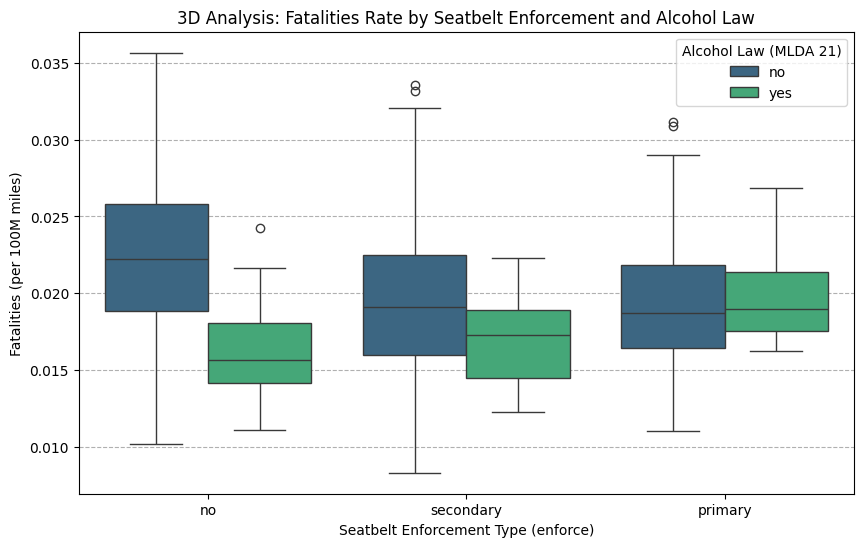

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PROJECT START: SETUP AND CLEANING ---

# Load dataset (Replace with your actual path/method if needed)
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
df = df.dropna(subset=['seatbelt'])

print("Dataset ready for 3D Analysis...\n")


# --- 3D ANALYSIS: BOX PLOT (NUMERICAL vs CATEGORICAL vs CATEGORICAL) ---


plt.figure(figsize=(10, 6))

# Plotting 'fatalities' (Y-axis) against 'enforce' (X-axis) and
# using 'alcohol' (Hue) as the third variable for segmentation.
sns.boxplot(
    x='enforce',
    y='fatalities',
    hue='alcohol',
    data=df,
    palette='viridis'
)

plt.title('3D Analysis: Fatalities Rate by Seatbelt Enforcement and Alcohol Law')
plt.xlabel('Seatbelt Enforcement Type (enforce)')
plt.ylabel('Fatalities (per 100M miles)')
plt.legend(title='Alcohol Law (MLDA 21)')
plt.grid(axis='y', linestyle='--')
plt.show()



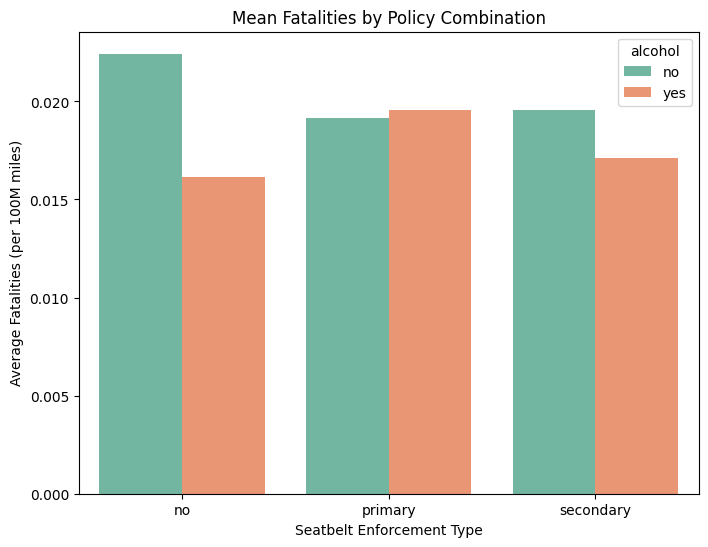

In [16]:
# Calculate the mean fatalities for every combination of enforce and alcohol
mean_fatalities = df.groupby(['enforce', 'alcohol'])['fatalities'].mean().reset_index()

plt.figure(figsize=(8, 6))
# Plot the mean values
sns.barplot(
    x='enforce',
    y='fatalities',
    hue='alcohol',
    data=mean_fatalities,
    palette='Set2'
)
plt.title('Mean Fatalities by Policy Combination')
plt.xlabel('Seatbelt Enforcement Type')
plt.ylabel('Average Fatalities (per 100M miles)')
plt.show()


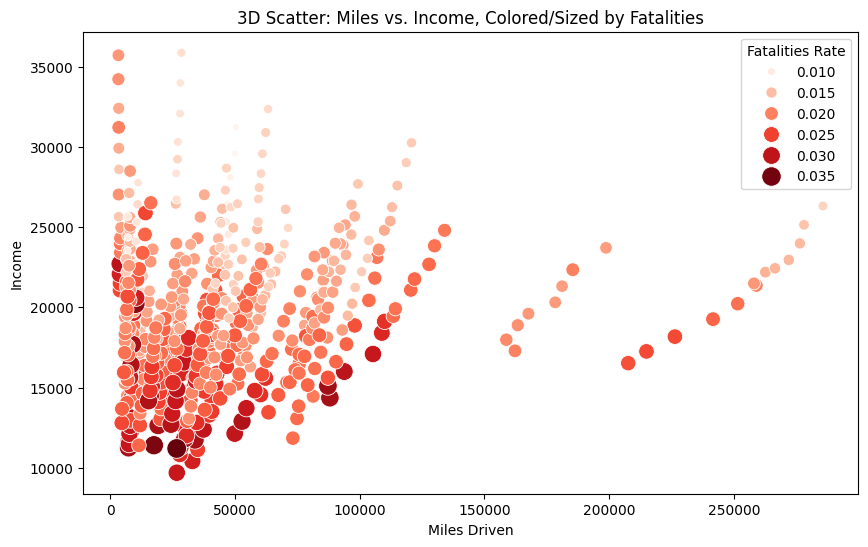

In [17]:
# Visualize 'miles' vs 'income', using 'fatalities' to color the points.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='miles',
    y='income',
    size='fatalities', # Uses fatalities to control marker size
    hue='fatalities', # Uses fatalities to control color intensity
    data=df,
    palette='Reds', # Use a sequential color map for numerical data
    sizes=(20, 200) # Define min/max marker size
)
plt.title('3D Scatter: Miles vs. Income, Colored/Sized by Fatalities')
plt.xlabel('Miles Driven')
plt.ylabel('Income')
plt.legend(title='Fatalities Rate')
plt.show()

Data Preprocessing Complete. Starting Hierarchical Clustering...


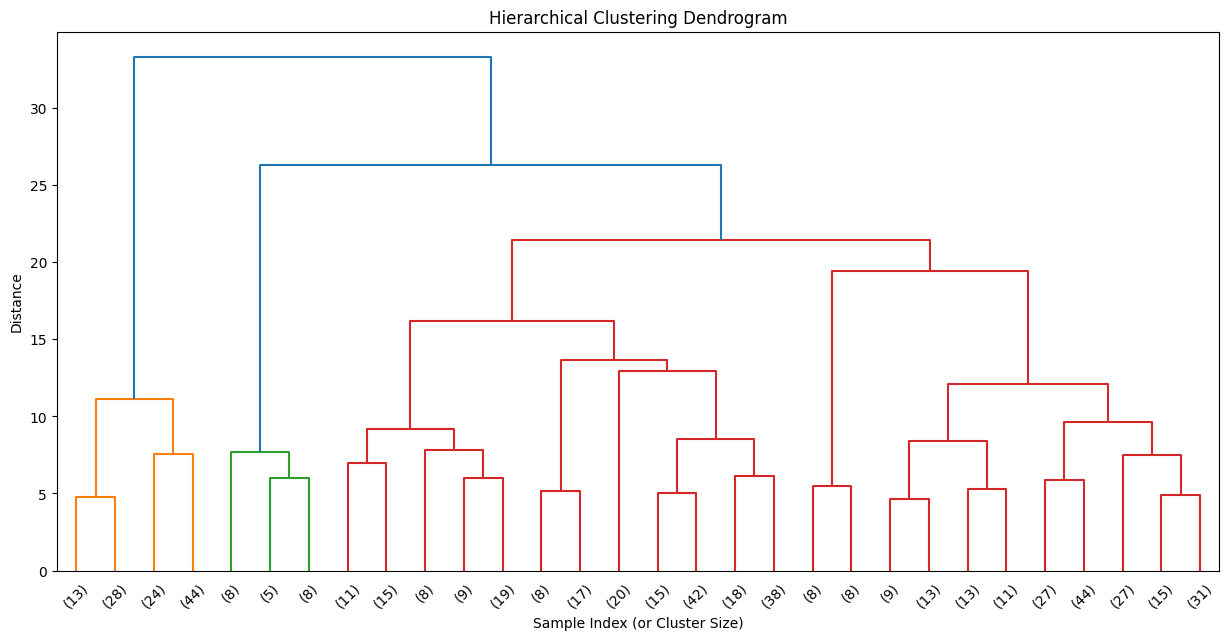


Agglomerative Clustering Results (k=4):
             fatalities          miles        income  seatbelt
Cluster_Agg                                                   
0              0.019961   32348.941748  18908.194175  0.509858
1              0.017473   51945.731818  22607.863636  0.655857
2              0.018758  223578.857143  20893.333333  0.660919
3              0.024233   26270.954128  14445.339450  0.282963


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# --- SETUP AND DATA PREPROCESSING (ESSENTIAL FOR CLUSTERING) ---

# Load dataset (Replace with your actual path/method if needed)
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print("Error loading data. Ensure the URL is accessible.")
    # Exit or handle error if loading fails

df = df.dropna(subset=['seatbelt'])

# 1. Feature Selection: Drop non-predictive/ID columns
df_model = df.drop(columns=['rownames', 'state', 'year'])

# 2. One-Hot Encoding for Categorical Features
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']
X = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
X_clust = X.drop(columns=['fatalities'])

# 3. Scaling Numeric Features (CRITICAL for distance-based clustering)
numeric_features_to_scale = ['miles', 'seatbelt', 'income', 'age']
scaler = StandardScaler()
X_clust[numeric_features_to_scale] = scaler.fit_transform(X_clust[numeric_features_to_scale])

print("Data Preprocessing Complete. Starting Hierarchical Clustering...")

# --- HIERARCHICAL AGGLOMERATIVE CLUSTERING ---


# 1. Create Linkage Matrix (This is the clustering step itself)
# 'ward' linkage minimizes the variance of the clusters being merged.
linked = linkage(X_clust, method='ward')

# 2. Visualize the Dendrogram
# Use this visualization to determine your optimal number of clusters (k).
# You choose k by drawing a horizontal line across the dendrogram at a distance
# that creates the desired number of vertical clusters.
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp', # Show only the last 'p' merged clusters
           p=30, # Show last 30 merges
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index (or Cluster Size)')
plt.ylabel('Distance')
plt.show()

# 3. Apply Clustering (Based on k observed from the Dendrogram)
# For demonstration, we assume k=4. ADJUST n_clusters based on your Dendrogram cut.
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels_agg = agg_clustering.fit_predict(X_clust)

# 4. Analyze Results
# Add cluster labels to the original (unscaled) df_model for easy interpretation of means.
df_model['Cluster_Agg'] = cluster_labels_agg
agg_analysis = df_model.groupby('Cluster_Agg')[['fatalities', 'miles', 'income', 'seatbelt']].mean()

print(f"\nAgglomerative Clustering Results (k={n_clusters}):")
print(agg_analysis)